# MEng-Team-Project-ML

This notebook contains the initial analysis of SQLite DB files generated \
by our ML system as of February 2022 (refer to git commit for exact \
version).

Each one of our key objectives is far easier to implement than before because\
the StrongSORT algorithm is very performant, and easy to calibrate for our use\
case.
- Object Identification 
  - This objective is the easiest to implement as we have the predicted \
    object along with it's bounding box per frame.
- Object Count
  - For this objective, we just count the number of unique IDs across time. The \
    lower the IDs (identity switching) and higher the AssA (association accuracy) \
    of our model for our dataset, the more reliable this object count will be, and \
    less post-processing of the analytics will be required.
- Object Tracking
  - For each object which is being successfully tracked and ID'd, we track its \
    detected bounding box across time and see which boundaries of the video footage \
    it's intersecting with to see which routes it's going from and to.

## Load Dataset

### Load COCO Classes

In [1]:
COCO_CLASSES = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]

### Load Pre-Saved Analytical Dataset (SQLite)

In [2]:
import os
from traffic_ml.lib.gdrive import get_gdrive_id, download_file_from_google_drive

TEST_FILE_FNAME = "tfl_snow.db"
TEST_FILE_LINK  = "https://drive.google.com/file/d/1c7TE4w39T-fEKqq8DbO8NCsK-N5c3MO5/view?usp=sharing"

gdrive_id = get_gdrive_id(TEST_FILE_LINK)
out = download_file_from_google_drive(gdrive_id, f"./{TEST_FILE_FNAME}")

if os.path.exists(TEST_FILE_FNAME):
    print("Downloaded successfully!")
else:
    print(f"Error downloading: {TEST_FILE_FNAME}")

Downloaded successfully!


## Data Analysis

### Load Data into Dataframes

In [3]:
import sqlite3
import pandas as pd

con = sqlite3.connect(TEST_FILE_FNAME)

# Detected Objects per Frame
detections_df = pd.read_sql_query("SELECT * FROM detection;", con)

con.close()

### Detection Count (per Frame)

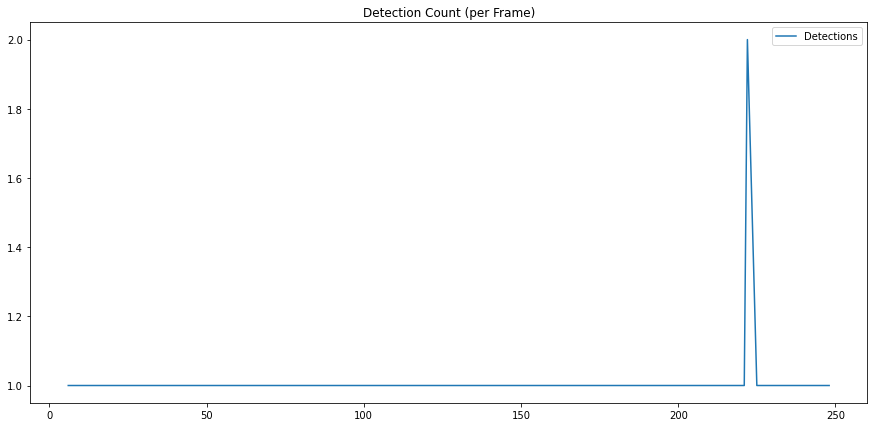

In [4]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

det_count = detections_df["frame"].value_counts().sort_index()

plt.title("Detection Count (per Frame)")
plt.plot(det_count, label="Detections")

plt.legend()